# **MODEL CUSTOMER PREDICTION MACHINE LEARNING**

## **Business Understanding**

**Context**:

Capital Bikeshare, sebuah layanan penyewaan sepeda yang beraada kota besar Washington, D.C, berfokus pada memberikan solusi transportasi ramah lingkungan dan efisien. Untuk mendukung keputusan strategis dan operasional, perusahaan ingin memprediksi jumlah pelanggan yang akan menggunakan sepeda pada periode mendatang, berdasarkan data historis yang mencakup faktor-faktor seperti waktu, cuaca, dan kondisi lingkungan lainnya. Model prediksi yang akurat dapat membantu mereka dalam perencanaan operasional, termasuk pengelolaan armada sepeda, penentuan lokasi stasiun yang optimal, dan pemanfaatan sumber daya dengan lebih efisien.

**Problem Statement**:

Permasalahan utama yang dihadapi oleh Capital Bikeshare adalah bagaimana memprediksi jumlah pelanggan yang akan menggunakan sepeda dalam periode tertentu, terutama untuk merencanakan sumber daya dan ekspansi bisnis mereka.

**Goals**:

Tujuan utama dari proyek ini adalah untuk membangun model machine learning yang dapat memprediksi jumlah total pelanggan yang akan menggunakan sepeda berdasarkan data historis yang tersedia. Model ini bertujuan untuk mencapai tingkat akurasi yang tinggi dalam memprediksi, dengan pertimbangan berbagai faktor yang memengaruhi permintaan, seperti hari dalam minggu, musim, dan kondisi cuaca. Selain itu, model ini diharapkan dapat digunakan oleh tim strategis untuk merencanakan ekspansi lokasi dan pengelolaan sumber daya secara lebih efektif lagi kedepannya.

**Analytical Approach**:

Pendekatan analitik yang digunakan dalam proyek ini melibatkan beberapa tahapan, dimulai dengan eksplorasi dan pembersihan data, kemudian dilanjutkan pemilihan fitur yang relevan dan pembuatan model prediktif menggunakan algoritma regresi, seperti LinearRegression(), XGBRegressor(), RandomForestRegressor(), dan lainnya. Data yang digunakan mencakup variabel waktu dan lingkungan, seperti suhu, kelembapan, dan cuaca. Setelah pemodelan awal, dilakukan hyperparameter tuning untuk meningkatkan performa model dan memilih model terbaik berdasarkan kriteria evaluasi yang ditetapkan.

**Metrics Evaluation**:

Untuk mengevaluasi performa model, metrik yang digunakan adalah Mean Absolute Error (MAE) dan Mean Absolute Percentage Error (MAPE), yang memberikan gambaran tentang seberapa besar kesalahan yang terjadi dalam prediksi jumlah pelanggan. MAPE dipilih karena kemudahan interpretasi oleh stakeholders, sementara MAE digunakan untuk memberikan gambaran lebih jelas tentang seberapa besar kesalahan dalam prediksi secara absolut. Model yang terpilih harus memiliki MAPE yang rendah untuk memastikan akurasi prediksi yang baik, terutama pada data yang tidak terlihat sebelumnya (data test).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [3]:
dfBike = pd.read_csv('data_bike_sharing.csv')
dfBike

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


**KETERANGAN DATA**

- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/  holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [7]:
# Ekstrak informasi-informasi umum (Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in dfBike.columns :
    list_item.append([
        i,
        dfBike[i].dtype,
        dfBike[i].isna().sum(),
        round(dfBike[i].isna().sum()/len(dfBike), 2),
        dfBike[i].nunique(),
        dfBike[i].unique()[:3]
    ])

info_df = pd.DataFrame(list_item,
                       columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, N Unique, Unique Sampe'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,N Unique,Unique Sampe
0,dteday,object,0,0.0,731,"[2011-12-09, 2012-06-17, 2011-06-15]"
1,hum,float64,0,0.0,89,"[0.62, 0.64, 0.53]"
2,weathersit,int64,0,0.0,4,"[1, 2, 3]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 2, 3]"
5,atemp,float64,0,0.0,65,"[0.3485, 0.5152, 0.6212]"
6,temp,float64,0,0.0,50,"[0.36, 0.54, 0.62]"
7,hr,int64,0,0.0,24,"[16, 4, 23]"
8,casual,int64,0,0.0,305,"[24, 2, 17]"
9,registered,int64,0,0.0,742,"[226, 16, 90]"


## **DATA CLEANING & EDA**

In [9]:
# Ubah tipe data dteday menjadi datetime

dfBike['dteday'] = pd.to_datetime(dfBike['dteday'])
dfBike.insert(1,'month',dfBike['dteday'].dt.month)

**Cek Anomali dan outliers pada data set**

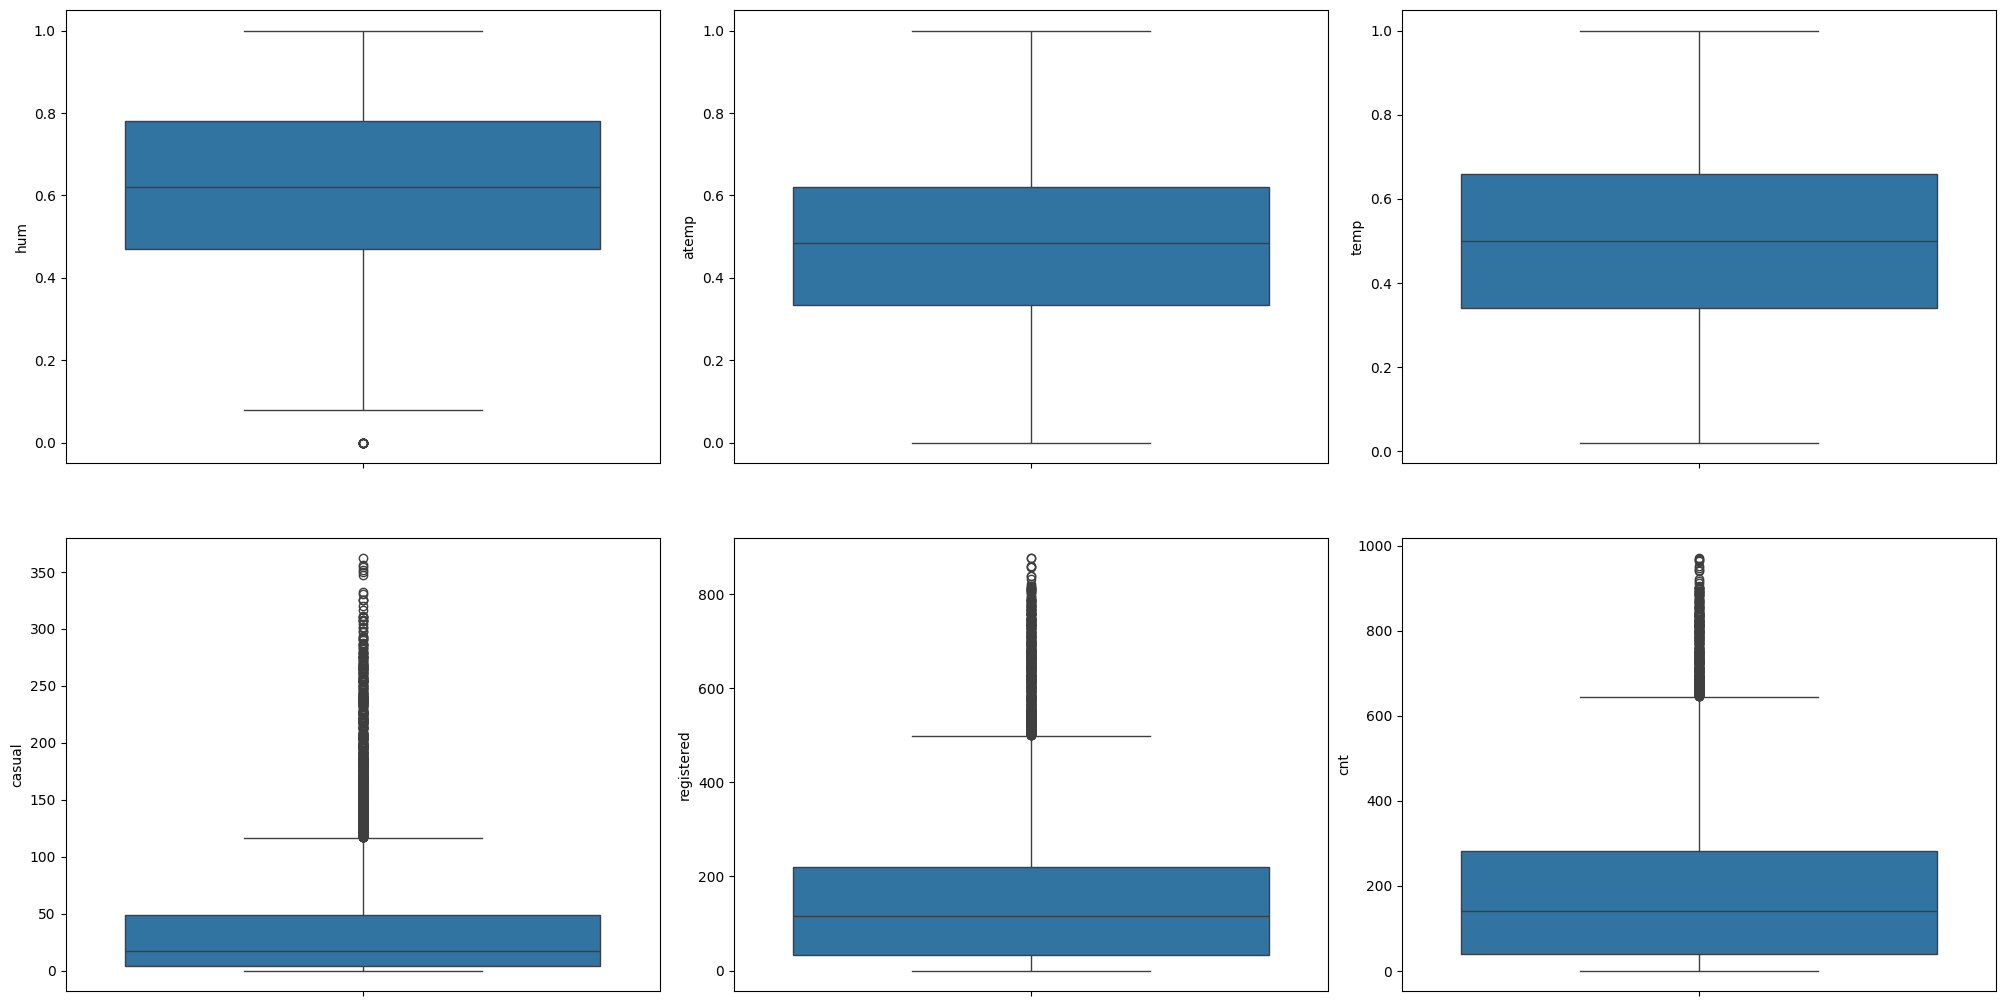

In [10]:
numericCols = dfBike.drop(['month','weathersit','holiday','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=dfBike, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Dapat dilihat bahwa pada kolom humadity terdapat value 0, yang mana terlihat sebagai anomaly, maka saya putuskan untuk drop data tersebut.

np.float64(0.47)

np.float64(0.78)

np.float64(0.31000000000000005)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   month       12165 non-null  int32         
 2   hum         12165 non-null  float64       
 3   weathersit  12165 non-null  int64         
 4   holiday     12165 non-null  int64         
 5   season      12165 non-null  int64         
 6   atemp       12165 non-null  float64       
 7   temp        12165 non-null  float64       
 8   hr          12165 non-null  int64         
 9   casual      12165 non-null  int64         
 10  registered  12165 non-null  int64         
 11  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7)
memory usage: 1.1 MB


,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,3,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,3,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,3,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,3,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,3,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,3,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,3,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,3,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,3,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,3,0.0,3,0,1,0.3485,0.34,23,1,26,27


Index([  345,   871,  1645,  3239,  3717,  4924,  7285,  7760,  8412,  8960,
        9186,  9651, 10715, 11766],
      dtype='int64')

None

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   month       12151 non-null  int32         
 2   hum         12151 non-null  float64       
 3   weathersit  12151 non-null  int64         
 4   holiday     12151 non-null  int64         
 5   season      12151 non-null  int64         
 6   atemp       12151 non-null  float64       
 7   temp        12151 non-null  float64       
 8   hr          12151 non-null  int64         
 9   casual      12151 non-null  int64         
 10  registered  12151 non-null  int64         
 11  cnt         12151 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7)
memory usage: 1.2 MB


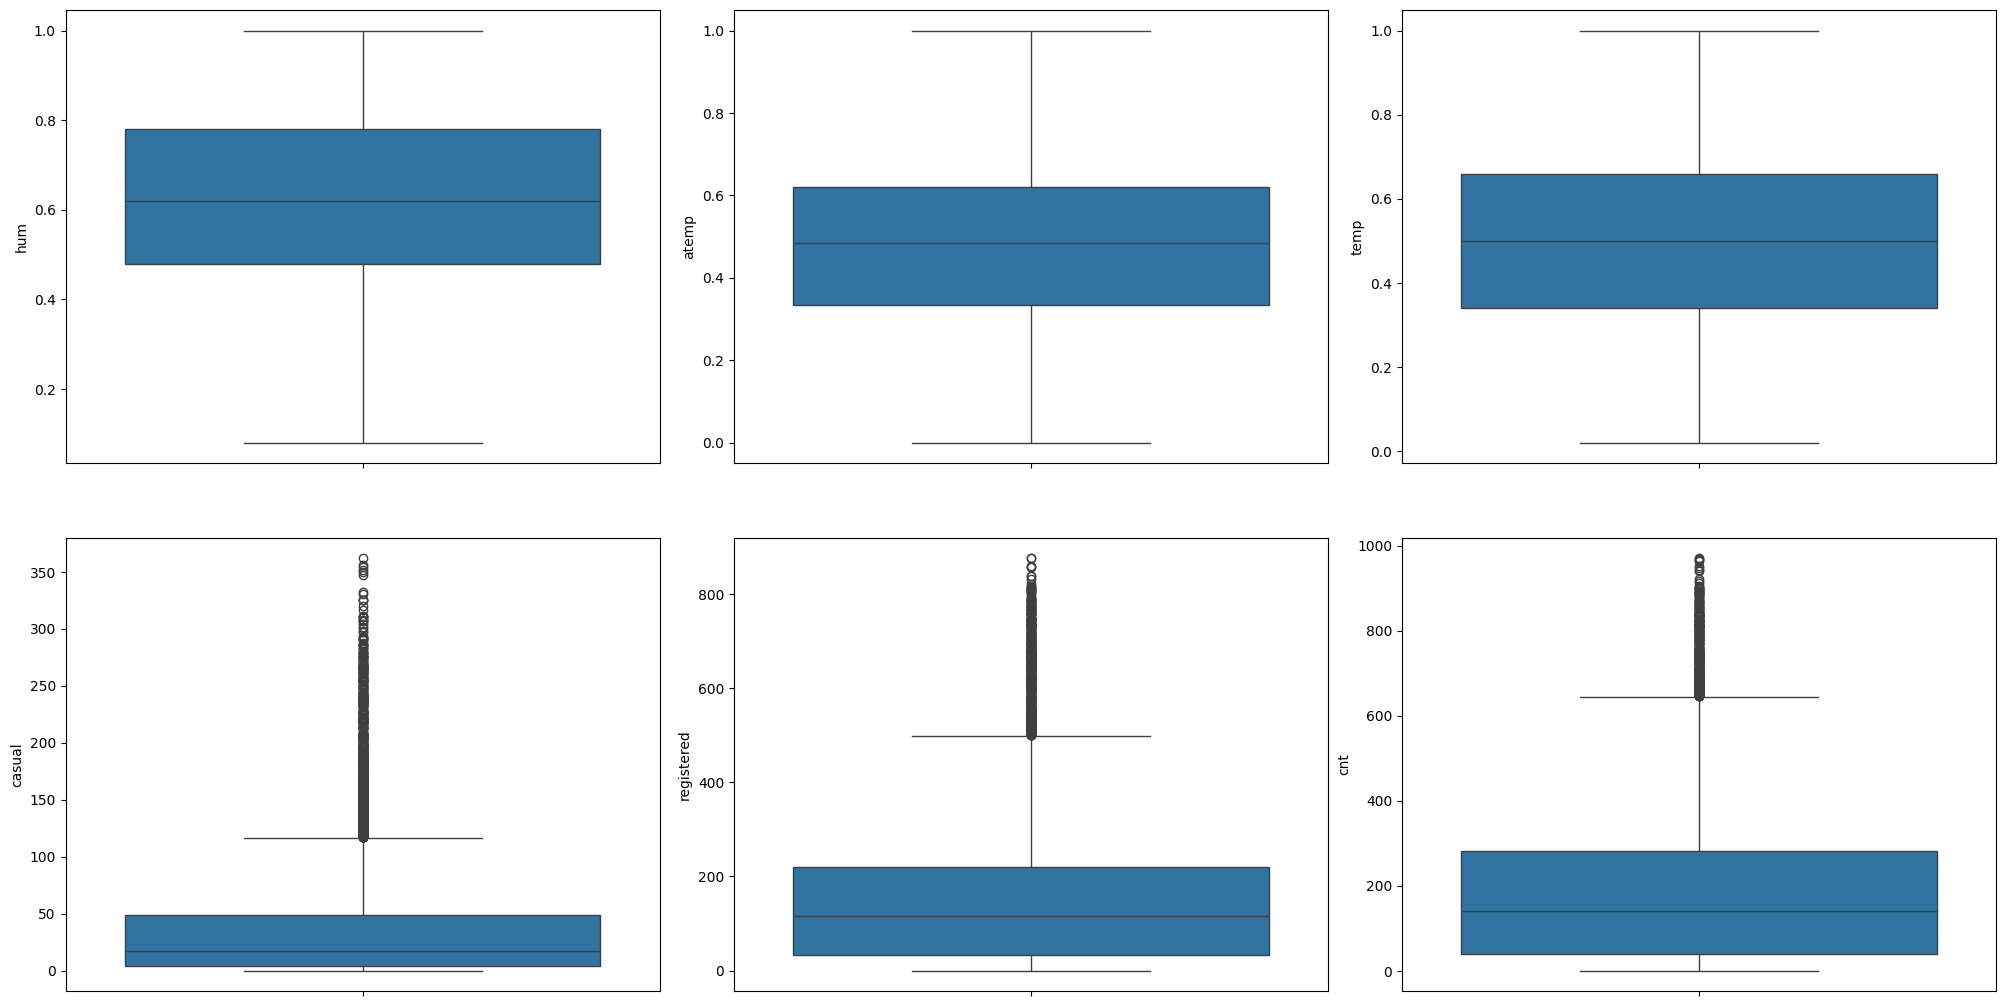

None

None

In [11]:
Q1count = dfBike['hum'].quantile(0.25)
Q3count = dfBike['hum'].quantile(0.75)
IQRcount = Q3count - Q1count
display(Q1count,Q3count,IQRcount)

outlierscount = dfBike[(dfBike['hum'] < Q1count - 1.5 * IQRcount) | (dfBike['hum'] > Q3count + 1.5 * IQRcount)]
display(outlierscount,
        outlierscount.index,
        dfBike.info())
dfBike = dfBike.drop(outlierscount.index)

numericCols = dfBike.drop(['month','weathersit','holiday','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=dfBike, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
display(dfBike.info(),
        plt.show())

Anomaly dan outliers sudah di takeout

dari dataset ini, jika diperhatian dan berdasarkan keterangan masing-masing fitur, dapat dilihat bahwa fitur casual dan registedred merupakan komponen pembentuk target (cnt), **dimana casual+registered = cnt**.  

In [14]:
import warnings

warnings.filterwarnings('ignore')

([<matplotlib.axis.XTick at 0x20700a78dd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31')])

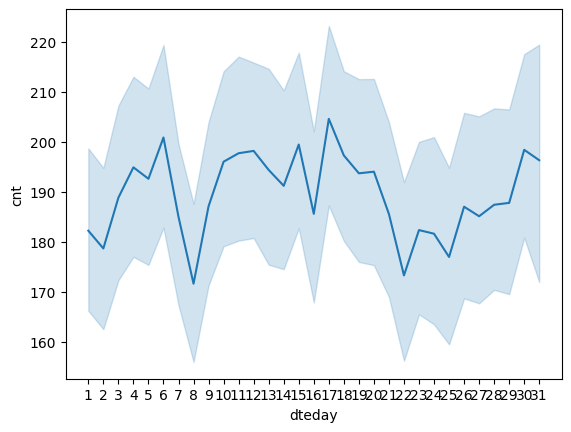

In [15]:
dayDate = dfBike['dteday'].dt.day

sns.lineplot(data=dfBike,
             x=dayDate,
             y='cnt')
plt.xticks(ticks=np.sort(dayDate.unique()))

Grafik diatas adalah gambaran total penyewa sepeda setiap harinya

In [ ]:
dfBike['dayDate'] = dayDate


0           Friday
1           Sunday
2        Wednesday
3         Saturday
4          Tuesday
           ...    
12160    Wednesday
12161       Friday
12162       Monday
12163     Saturday
12164     Thursday
Name: dteday, Length: 12151, dtype: object

([<matplotlib.axis.XTick at 0x207002e41d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

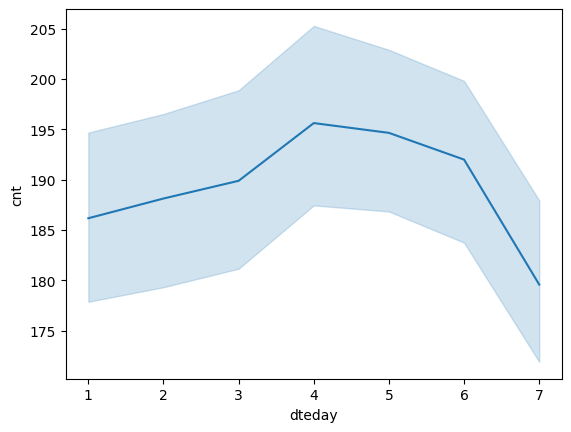

In [20]:
dayName = dfBike['dteday'].dt.strftime('%A')
display(dayName)
dayMapper = {'Monday' : 1,
             'Tuesday' : 2,
             'Wednesday' : 3,
             'Thursday' : 4,
             'Friday' : 5,
             'Saturday' : 6,
             'Sunday' : 7}

dayName = dayName.map(dayMapper)
sns.lineplot(data=dfBike,
             x=dayName,
             y='cnt')
plt.xticks(ticks=np.sort(dayName.unique()))

Grafik diatas menunjukkan gambaran total penyewaan sepeda setiap harinya di setiap minggu (senin-minggu)

In [21]:
dfBike['dayName'] = dayName

In [22]:
yearDate = dfBike['dteday'].dt.year
dfBike['year'] = yearDate

In [24]:
dfBike['weekdays'] = np.where(dfBike['dayName'] > 5, 0, 1)

In [25]:
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6,2012,0
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6,2012,0


([<matplotlib.axis.XTick at 0x20700368860>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

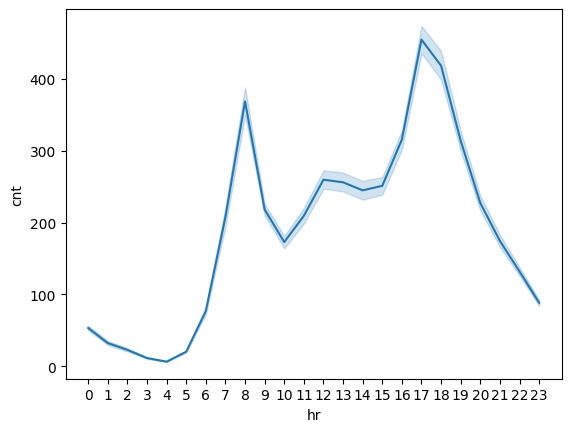

In [26]:
sns.lineplot(data=dfBike,
             x='hr',
             y='cnt')
plt.xticks(ticks=np.sort(dfBike['hr'].unique()))

diatas adalah total penyewaan sepeda berdasarkan jam. dapat dilihat bahwa terjadi lonjakan di jam kerja (jam 6 sampai jam 19)

<Axes: xlabel='year', ylabel='cnt'>

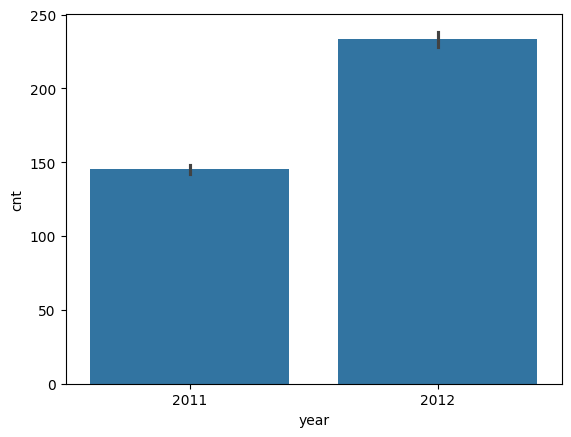

In [27]:
sns.barplot(data=dfBike,
             x='year',
             y='cnt')

<Axes: xlabel='weathersit', ylabel='cnt'>

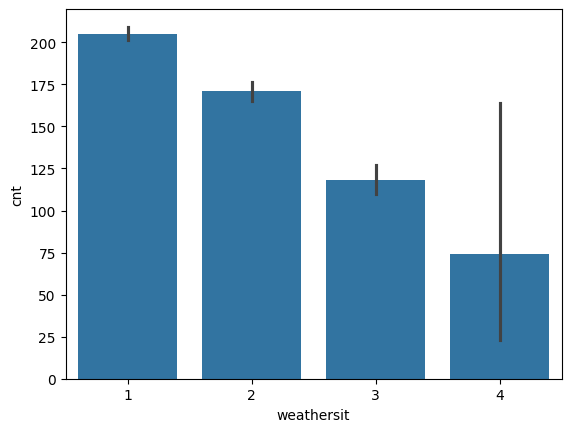

In [28]:
sns.barplot(data=dfBike,
             x='weathersit',
             y='cnt')

In [29]:
dfBike['weathersit'].value_counts()

weathersit
1    8071
2    3117
3     960
4       3
Name: count, dtype: int64

Dapat dilihat bahwa cuaca memiliki pengaruh yang cukup signifikan dengan total penyewaan sepeda. disini telah kita tahu bahwa sebelumnya :
**weathersit** -1: Clear, Few clouds, Partly cloudy, Partly cloudy  
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  



<Axes: xlabel='holiday', ylabel='cnt'>

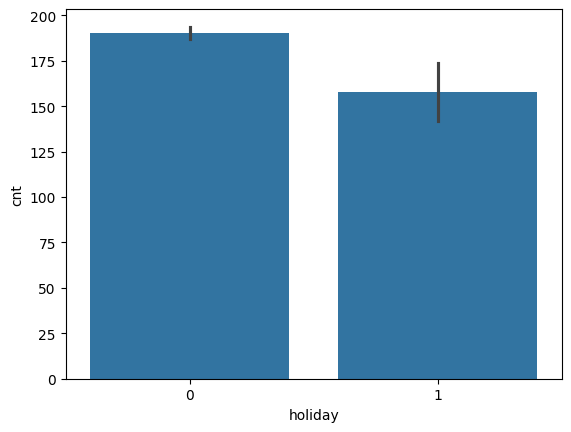

In [30]:
sns.barplot(data=dfBike,
             x='holiday',
             y='cnt')

Total penyewaan sepeda berdasarkan waktu dimana libur atau tidak terlihat cukup berbeda yang mana total sewa sepeda pada saat holiday lebih sedikit dibanding ketika waktu bukan holiday

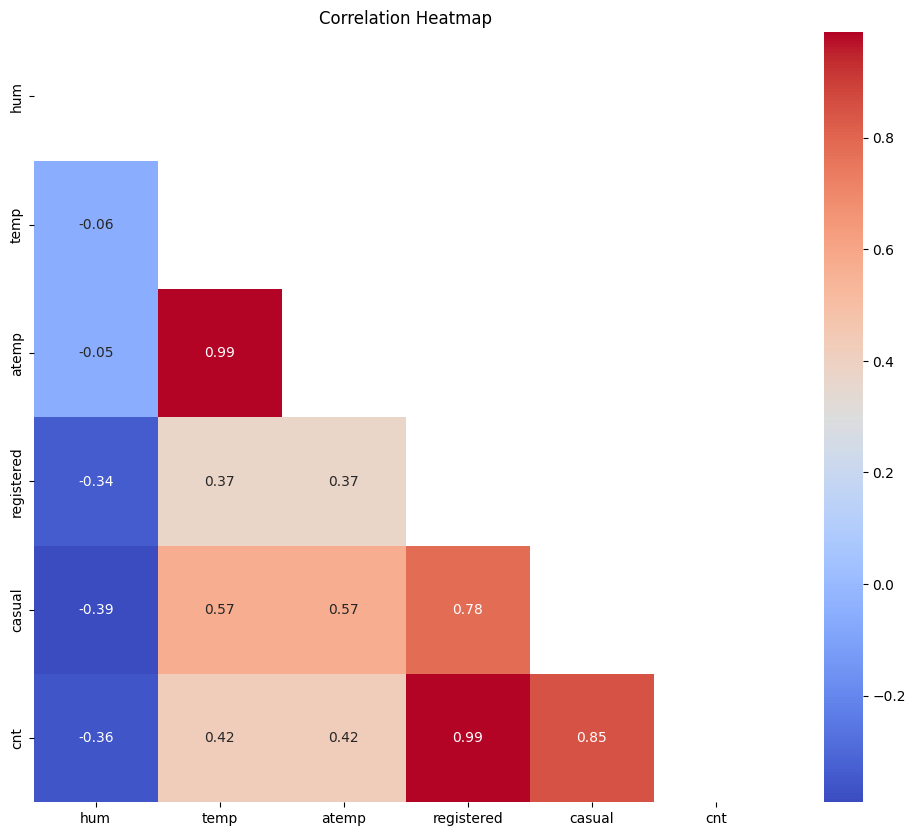

In [31]:
dfBikeCorr = dfBike[['hum','temp','atemp','registered','casual','cnt']].corr('spearman') # pearson numeric2 continuous dan coba chi square untuk cat to num
mask = np.triu(np.ones_like(dfBikeCorr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(dfBikeCorr, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap")
plt.show()

Dapat dilihat bahwa korelasi antar setiap variable numerik (hum, temp, atemp, cnt), yang mana variable temp dan atemp merupakan variable yang mengandung value dan purpose yang sama, sehingga kita hanya boleh menggunakan satu diantara keduanya saat proses pemodelan.

Kemudian, dari dataset ini, jika diperhatian dan berdasarkan keterangan masing-masing fitur, dapat dilihat bahwa fitur casual dan registedred merupakan komponen pembentuk target (cnt), **dimana casual+registered = cnt**.  

**Note : dalam pembentukan ML ketika ada features yang merupakan komponen dari target, maka komponen tersebut harus di takeout karena akan sangat mempengaruhi target**

Maka dari itu, kita dapat melakukan drop  pada fitur/kolom tersebut.

In [32]:
dfBike['holiday'] = dfBike['holiday'].astype('category')
dfBike['weathersit'] = dfBike['weathersit'].astype('category')
dfBike['month'] = dfBike['month'].astype('category')
dfBike['hr'] = dfBike['hr'].astype('category')
dfBike['dayDate'] = dfBike['dayDate'].astype('category')
dfBike['dayName'] = dfBike['dayName'].astype('category')
dfBike['season'] = dfBike['season'].astype('category')
dfBike['weekdays'] = dfBike['weekdays'].astype('category')
dfBike['year'] = dfBike['year'].astype('category')
dfBike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   month       12151 non-null  category      
 2   hum         12151 non-null  float64       
 3   weathersit  12151 non-null  category      
 4   holiday     12151 non-null  category      
 5   season      12151 non-null  category      
 6   atemp       12151 non-null  float64       
 7   temp        12151 non-null  float64       
 8   hr          12151 non-null  category      
 9   casual      12151 non-null  int64         
 10  registered  12151 non-null  int64         
 11  cnt         12151 non-null  int64         
 12  dayDate     12151 non-null  category      
 13  dayName     12151 non-null  category      
 14  year        12151 non-null  category      
 15  weekdays    12151 non-null  category      
dtypes: category(9), datetime64[

In [45]:
databike = dfBike

In [51]:
dfBike = databike

In [66]:
dfBike.loc[dfBike['weathersit'] == 4,'weathersit'] = 3
dfBike['weathersit'].value_counts()

weathersit
1    8071
2    3117
3     963
4       0
Name: count, dtype: int64

Sebagai tambahan pada kolom weathersit value dengan kategori 4 hanya memiliki value sebanyak 3, yang mana jika dilihat dari maknanya weathersit '3' (Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar) dan '4' (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) dapat dikategorikan sebagai hari hujan.

Kemudian, untuk kolom dteday karena sudah kita lakukan split atau memecahnya menjadi komponen bagian yang terpisah (year, month, day), maka dirasa sudah tidak diperlukan lagi, maka kita dapat putuskan untuk mendrop langsung kolom tersebut

In [ ]:
# Drop dteday, atemp, registered, casual


dfBike = dfBike.drop(['dteday', 'atemp', 'registered', 'casual'], axis = 1)


## **Modeling**

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor()
svreg = SVR()
rfreg = RandomForestRegressor()
xgbreg = XGBRegressor()
ridgereg = Ridge()
lassoreg = Lasso()
gradientreg = GradientBoostingRegressor()
normalModel = [linreg,knnreg,treereg,svreg,rfreg,xgbreg,ridgereg,lassoreg,gradientreg]
normalModelName = ['linreg','knnreg','treereg','svreg','rfreg','xgbreg','ridgereg','lassoreg','gradientreg']

In [58]:
# Skema Pre Processing

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoderOHE = OneHotEncoder()
transformer = ColumnTransformer([('encodingOHE',encoderOHE,['weathersit','season','dayName'])],
                                remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encodingOHE', OneHotEncoder(),
                                 ['weathersit', 'season', 'dayName'])])

In [70]:
from sklearn.model_selection import train_test_split

xBike = dfBike.drop(['cnt'],axis = 1)
yBike = dfBike['cnt']

xTrainBike, xTestBike, yTrainBike, yTestBike = train_test_split(xBike,
                                                                yBike,
                                                                random_state = 99,
                                                                test_size = 0.2)

Split data Train dan Data Set

Proporsi spliting data ini yaitu : 
- 80% dari keseluruhan data dijadikan sebagai Data Train, sebagaimana untuk melatih model 
- 20% lainnya sebagai Data Test, untuk mengevaluasi konerja model nantinya pada data yang belum pernag dilihat pada model yang telah dibuat sebelumnya.

## **Benchmarking Model**

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV

In [73]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in normalModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCV = pd.DataFrame()
dfCV['algo'] = normalModelName
dfCV['MAEmean'] = listMAEmean
dfCV['MAEstd'] = listMAEstd
dfCV['MAEall'] = listMAEall
dfCV['MAPEmean'] = listMAPEmean
dfCV['MAPEstd'] = listMAPEstd
dfCV['MAPEall'] = listMAPEall
dfCV['MSEmean'] = listMSEmean
dfCV['MSEstd'] = listMSEstd
dfCV['MSEall'] = listMSEall
dfCV['RMSEmean'] = listRMSEmean
dfCV['RMSEstd'] = listRMSEstd
dfCV['RMSEall'] = listRMSEall
dfCV

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,linreg,-105.761440,1.290365,"[-104.77135577417695, -106.03295396090535, -104.10231401105968, -106.03055776588221, -107.870016718107]",-3.315361,0.192070,"[-3.529660837018102, -3.2946368100872356, -3.54008865683628, -3.0988575213089735, -3.1135600863837953]",-20007.513334,813.946154,"[-19298.238120122212, -20099.893259307486, -19158.04524411488, -20032.094459665164, -21449.29558698238]",-141.419069,2.856629,"[-138.9180986053373, -141.77409234168098, -138.41259062713507, -141.5347818017365, -146.45578031263355]"
1,knnreg,-58.299630,1.433094,"[-56.60133744855967, -57.564609053497946, -57.57016460905349, -60.690534979423866, -59.071502057613166]",-0.798193,0.069359,"[-0.7722700226943736, -0.7637093297750995, -0.93206078694426, -0.7895095687041236, -0.7334135725822473]",-7874.272683,349.543385,"[-7603.659938271605, -7524.384320987655, -7734.048271604938, -8485.108024691359, -8024.162860082304]",-88.715590,1.953635,"[-87.19896752984869, -86.7432090770664, -87.94343791099446, -92.11464609220056, -89.57769175460096]"
2,treereg,-37.340432,1.667559,"[-35.593106995884774, -36.43775720164609, -36.5951646090535, -40.401234567901234, -37.674897119341566]",-0.402306,0.027284,"[-0.36620119850398697, -0.37830784735849937, -0.43985093148403737, -0.423031594317752, -0.4041390559711914]",-3967.282202,394.348966,"[-3858.991255144033, -3509.1579218106995, -3844.088991769547, -4701.3127572016465, -3922.8600823045267]",-62.911700,3.065966,"[-62.12077957611312, -59.23814583366616, -62.000717671407216, -68.56611960145949, -62.632739699812966]"
3,svreg,-138.392878,4.612770,"[-131.34907044796728, -137.97167521902298, -136.0303723422416, -142.13955309914758, -144.47371666796698]",-5.650286,0.384184,"[-6.030387582920945, -5.672134108469307, -6.113506364917423, -5.263510399986459, -5.171889441132933]",-35381.810417,3031.210824,"[-30876.40977332858, -35140.4612385003, -33737.60380220355, -37468.52053038048, -39686.05674118026]",-187.926839,8.081692,"[-175.71684544553088, -187.457891907757, -183.6779894331478, -193.56787060455173, -199.21359577393372]"
4,rfreg,-28.248601,1.314979,"[-25.993410493827163, -27.878991769547326, -29.076255144032924, -29.89666666666667, -28.397680041152263]",-0.345157,0.024082,"[-0.3184977107034688, -0.32085376386146036, -0.37707275805682666, -0.3687945705895433, -0.3405644640238544]",-2172.116042,128.908984,"[-2020.7431908950618, -2026.2491685185187, -2271.7809183127574, -2339.6266352880657, -2202.180297376543]",-46.585368,1.385479,"[-44.95267723834768, -45.01387751036916, -47.663202980000804, -48.36968715309275, -46.927393890738735]"
5,xgbreg,-26.653418,0.959263,"[-25.242785646568663, -26.24003504931068, -27.90974598574939, -27.529149558732417, -26.34537283819046]",-0.452934,0.021494,"[-0.45611195042520347, -0.45674901147013064, -0.48388592385705, -0.4165350774819006, -0.45138999691038006]",-1788.539527,162.710144,"[-1635.5615975226467, -1640.836353829232, -1895.0090006775804, -2054.405012688928, -1716.8856704637215]",-42.248376,1.901117,"[-40.442077067364465, -40.50723828933826, -43.5317011002049, -45.32554481403316, -41.43531911864227]"
6,ridgereg,-105.767361,1.335082,"[-104.73910913365398, -106.06860168068951, -104.04810315763025, -106.03755397737064, -107.94343855663986]",-3.316684,0.190460,"[-3.525320728019325, -3.2939366259377274, -3.5436480664460164, -3.093067840947869, -3.1274446294730227]",-20012.996328,826.351680,"[-19288.36193744895, -20111.277921918972, -19149.105566511957, -20042.991879874975, -21473.24433614043]",-141.437574,2.899822,"[-138.8825472744828, -141.81423737382283, -138.3802932736882, -141.57327388979522, -146.5375185273056]"
7,lassoreg,-105.649207,1.394493,"[-103.87171288221616, -105.93845007786935, -104.39991233872679, -106.252441886316, -107.78351717242559]",-3.299851,0.202395,"[-3.5098172201202282, -3.2844004144006833, -3.5485621423995886, -3.0638858136341245, -3.092590298847937]",-20157.580404,913.914

Dari hasil yang ditunjukkan, nilai MAPE dan MAE terendah yaitu pada base model XGBRegressor dengan skor MAE 26% namun skor MAPE 45% yang mana dirasa masih terbilang cukup tinggi.

Setelah mencari beberapa referensi mengenai penyebab terjadinya case seperti ini, bahwa yang menyebabkan nilai MAPE besar ini karena adanya sejumlah kecil nilai target, terutama jika nilainya nol atau mendekati nol

source : (https://stackoverflow.com/questions/72382501/how-to-interpret-mape-in-python-sklearn)

Pada visualisasi target pada kolom `cnt` sebelumnya terlihat bahwa sebagian besar data terpusat pada angka rendah yaitu dibawah 300, dibandingkan dengan data lainnya yang lebih besar pada rentang 0-1000, dan inilah yang dimaksud bahwa penyebab nilai MAPE menjadi lebih besar.
Oleh karena itu, untuk mengurangi sensitivitas terhadap nilai atau angka yang lebih kecil, sebaiknya dapat dilakukan transformasi target menjadi skala yang tidak terlalu sensitif terhadap nilai nol atau angka kecil, untuk mengurangi kesalahan presentase yang besar menggunakan transformer algoritma

In [76]:
from sklearn.compose import TransformedTargetRegressor

log_linreg = TransformedTargetRegressor(linreg, func=np.log1p, inverse_func=np.expm1)
log_knnreg = TransformedTargetRegressor(knnreg, func=np.log1p, inverse_func=np.expm1)
log_treereg = TransformedTargetRegressor(treereg, func=np.log1p, inverse_func=np.expm1)
log_rfreg = TransformedTargetRegressor(rfreg, func=np.log1p, inverse_func=np.expm1)
log_svreg = TransformedTargetRegressor(svreg, func=np.log1p, inverse_func=np.expm1)
log_xgbreg = TransformedTargetRegressor(xgbreg, func=np.log1p, inverse_func=np.expm1)
log_ridgereg = TransformedTargetRegressor(ridgereg, func=np.log1p, inverse_func=np.expm1)
log_lassoreg = TransformedTargetRegressor(lassoreg, func=np.log1p, inverse_func=np.expm1)
log_gradientreg = TransformedTargetRegressor(gradientreg, func=np.log1p, inverse_func=np.expm1)
logModel = [log_linreg,log_knnreg,log_treereg,log_svreg,log_rfreg,log_xgbreg,log_ridgereg,log_lassoreg,log_gradientreg]
logModelName = ['log_linreg','log_knnreg','log_treereg','log_svreg','log_rfreg','log_xgbreg','log_ridgereg','log_lassoreg','log_gradientreg']

<Axes: ylabel='cnt'>

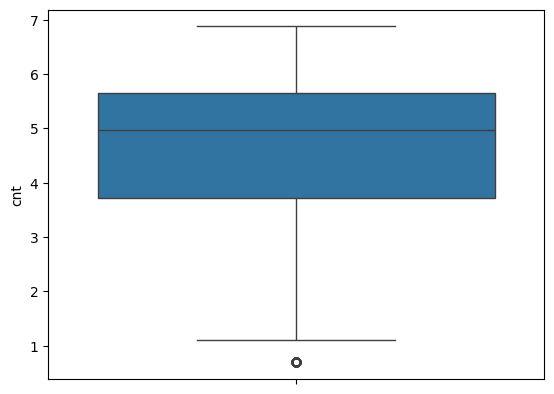

In [77]:
sns.boxplot(y = np.log1p(dfBike['cnt']))

Setelah itu, dilakukan proses cross validation kembali

In [78]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in logModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCVlog = pd.DataFrame()
dfCVlog['algo'] = logModelName
dfCVlog['MAEmean'] = listMAEmean
dfCVlog['MAEstd'] = listMAEstd
dfCVlog['MAEall'] = listMAEall
dfCVlog['MAPEmean'] = listMAPEmean
dfCVlog['MAPEstd'] = listMAPEstd
dfCVlog['MAPEall'] = listMAPEall
dfCVlog['MSEmean'] = listMSEmean
dfCVlog['MSEstd'] = listMSEstd
dfCVlog['MSEall'] = listMSEall
dfCVlog['RMSEmean'] = listRMSEmean
dfCVlog['RMSEstd'] = listRMSEstd
dfCVlog['RMSEall'] = listRMSEall
dfCVlog

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,log_linreg,-106.368037,1.715716,"[-105.29539603082988, -106.31895146597364, -103.84015859423127, -108.70050847324785, -107.68517086369265]",-1.418726,0.066975,"[-1.4794190314816678, -1.423416358948998, -1.5039444754512796, -1.3511645593601336, -1.3356863870381261]",-26104.302118,532.076855,"[-25985.953030796984, -26061.439834138582, -25196.202644590696, -26598.167074359255, -26679.74800602634]",-161.559816,1.651699,"[-161.20159127873703, -161.4355593855907, -158.7331176679608, -163.08944501211369, -163.33936453294515]"
1,log_knnreg,-55.884575,2.003493,"[-52.81992617836282, -56.42006945690971, -54.69042082992465, -58.75459009857439, -56.73787007008948]",-0.539210,0.043938,"[-0.5221891065812321, -0.5206358163061758, -0.6235873254440183, -0.5336465729649007, -0.49599296581311597]",-8180.068946,435.092770,"[-7628.051698188052, -8081.193540550053, -7946.318862596738, -8927.42614474048, -8317.354485107713]",-90.412179,2.388910,"[-87.33871820783753, -89.89545895399863, -89.14212731698036, -94.4850577855593, -91.19953116714862]"
2,log_treereg,-37.034259,1.664242,"[-34.00668724279836, -36.52109053497942, -37.81687242798354, -38.4511316872428, -38.37551440329218]",-0.384401,0.016643,"[-0.3711901302240899, -0.3700960097746705, -0.4098840333320936, -0.3987273001418064, -0.3721083032250277]",-3979.384465,350.243173,"[-3615.2608024691363, -3497.491255144033, -4211.181069958848, -4230.900720164608, -4342.088477366254]",-63.020029,2.803650,"[-60.12703886330289, -59.139591266291596, -64.8936134758949, -65.04537431796828, -65.894525397534]"
3,log_svreg,-134.072901,4.717416,"[-126.69836706053991, -133.80619060591943, -131.72959711345686, -138.20537590314632, -139.92497317059696]",-5.037463,0.333712,"[-5.365510026526131, -5.044486558688967, -5.446336412621205, -4.71672840691626, -4.614255313608122]",-34371.241058,3001.873545,"[-29893.98446710373, -34210.615469468656, -32712.370589347855, -36422.30281057454, -38616.931953610445]",-185.216739,8.124072,"[-172.8987694204436, -184.96111880465216, -180.86561472360592, -190.84628057830872, -196.51191300684658]"
4,log_rfreg,-28.084255,1.090292,"[-26.169969950020995, -27.95091473771441, -28.900498151305552, -29.346864762293173, -28.05302982726995]",-0.277015,0.013154,"[-0.2671988249040485, -0.2686219143740117, -0.29843443701549494, -0.28623673890076257, -0.26458268892005155]",-2211.807623,151.865736,"[-2054.242418231748, -2056.4401765463904, -2309.337846748241, -2189.8189679955076, -2449.1987046046715]",-47.002439,1.605738,"[-45.323751149168444, -45.34798977403949, -48.055570402901694, -46.79550157862941, -49.48937971529519]"
5,log_xgbreg,-26.034298,1.168960,"[-24.008000119846052, -25.70813491787194, -26.496298322768368, -27.536175093287795, -26.42288225558069]",-0.248575,0.008892,"[-0.24467858817219001, -0.24682677746984408, -0.2660880849013073, -0.2426365419169225, -0.24264554155280801]",-1839.463762,170.465716,"[-1630.9772821998702, -1655.5288641803004, -1898.1495353297566, -2072.89129647034, -1939.7718319376856]",-42.842633,1.993127,"[-40.385359750779365, -40.688190721391145, -43.56775797914963, -45.529015983989154, -44.04284087042621]"
6,log_ridgereg,-106.379965,1.835691,"[-105.17581243021475, -106.35359304850084, -103.71165726961885, -108.91153511813367, -107.74722843706579]",-1.418871,0.068320,"[-1.482689875198676, -1.4203222712886336, -1.5058650201493906, -1.3499213207106104, -1.3355560188355302]",-26116.916154,582.528354,"[-25925.401476393214, -26081.896288791457, -25146.81181339716, -26685.931894648675, -26744.539295257404]",-161.597181,1.807512,"[-161.01366860112594, -161.49890491514628, -158.57746313205152, -163.35829300849306, -163.53757762440227]"
7,log_lassoreg,-130.734139,5.188880,"[-122.30556800524623, -132.44877537175597, -127.47900933272915, -136.13975184579763, -135.29758827943823]",-2.128896,0.112297,"[-2.2014824693698327, -2.108468721246205, -2.305015622349511, -2.026885608454273, -2

Dari hasil diatas, dapat disimpulkan bahwa:
- `XGBRegressor()` adalah base model terbaik dengan 26% MAE dan 24% MAPE, yang kemudian disusul dengan
- `RandomForestRegressor()` dengan 28% MAE dan 27% MAPE

`XGBRegressor()` yaitu implementasi algoritma gradient boosting khusus untuk tugas regresi yang disediakan oleh library XGBoost (Extreme Gradient Boosting). Algoritma ini menggabungkan prediksi dari sejumlah model pohon keputusan lemah (weak learners) secara iteratif untuk meminimalkan error secara lebih efisien. 

`RandomForestRegressor()` yaitu algoritma ensemble yang menggunakan banyak pohon keputusan untuk melakukan prediksi regresi. Algoritma ini bekerja dengan membuat beberapa pohon secara acak dari subset data (bagging) dan menggabungkan prediksi masing-masing pohon untuk menghasilkan hasil akhir yang lebih stabil dan akurat. Dengan cara ini, RandomForestRegressor mengurangi risiko overfitting dan memberikan kinerja yang baik pada dataset yang kompleks serta non-linear. Selain itu, algoritma ini secara inheren mendukung seleksi fitur karena mampu mengevaluasi pentingnya setiap fitur dalam model.

## **Tunning best top base model**

**XGBRegressor()**

parameter dalam XGBRegressor(), yaitu `max_depth`, `learning_rate`, dan `n_estimators`, mempunya pengaruh yang penting dalam mengontrol kompleksitas dan kinerja model. Mengatur `max_depth` dapat mempengaruhi kedalaman pohon dan risiko overfitting atau underfitting, sementara `learning_rate` menentukan kecepatan pembelajaran dan kemampuan generalisasi model. Di sisi lain, `n_estimators` mengatur jumlah pohon yang membentuk ensemble, yang berhubungan langsung dengan kemampuan model untuk menangkap pola yang lebih kompleks, namun juga meningkatkan risiko overfitting. Oleh karena itu, pemilihan nilai parameter yang tepat sangat penting untuk mencapai keseimbangan antara kinerja optimal dan kemampuan generalisasi dalam model XGBoost.

In [80]:
hyperParamXGB = {'model__regressor__max_depth': list(np.arange(2, 10)), 
                 'model__regressor__learning_rate': list(np.arange(1, 101, 10)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 20))}

pipeXGB = Pipeline([('Preprocess', transformer),
                    ('model',log_xgbreg)])

gridSearchXGB = GridSearchCV(estimator = pipeXGB,
                             param_grid = hyperParamXGB,
                             cv = 5,
                             scoring = ['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error')

gridSearchXGB.fit(xTrainBike, yTrainBike)
display(gridSearchXGB.best_estimator_,
        gridSearchXGB.best_params_,
        gridSearchXGB.best_score_,
        pd.DataFrame(gridSearchXGB.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=np.float64(0.11),
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=np.int64(6),
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=np.int64(300),
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': np.float64(0.11),
 'model__regressor__max_depth': np.int64(6),
 'model__regressor__n_estimators': np.int64(300)}

np.float64(-0.23788738678322402)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_model__regressor__n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
77,0.289416,0.003599,0.012418,0.000664,0.11,6,300,"{'model__regressor__learning_rate': 0.11, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 300}",-22.852437,-23.355280,-25.184296,-25.491019,-24.258916,-24.228390,1.016316,13,-0.233148,-0.233041,-0.260952,-0.235884,-0.226412,-0.237887,0.011947,1,-1545.131180,-1372.908560,-1750.819268,-1964.714070,-1729.612953,-1672.637206,200.380944,22,-39.308157,-37.052781,-41.842792,-44.325095,-41.588616,-40.823488,2.465770,21
76,0.269798,0.003804,0.011443,0.000826,0.11,6,280,"{'model__regressor__learning_rate': 0.11, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 280}",-22.909931,-23.431620,-25.314826,-25.608147,-24.392887,-24.331482,1.042225,23,-0.233564,-0.233344,-0.261533,-0.236226,-0.227247,-0.238383,0.011943,2,-1545.255579,-1385.622765,-1762.689346,-1979.871561,-1736.353131,-1681.958476,202.351671,24,-39.309739,-37.223954,-41.984394,-44.495748,-41.669571,-40.936681,2.479236,24
125,0.289835,0.004682,0.013138,0.001163,0.21,6,300,"{'model__regressor__learning_rate': 0.21, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 300}",-23.371484,-23.724913,-25.278012,-25.259625,-24.339548,-24.394717,0.778070,27,-0.237416,-0.235370,-0.259517,-0.232731,-0.228549,-0.238717,0.010814,3,-1587.095049,-1478.141152,-1729.962788,-1802.803976,-1708.983756,-1661.397344,114.947975,19,-39.838362,-38.446601,-41.592821,-42.459439,-41.339857,-40.735416,1.422401,19
75,0.268891,0.023171,0.011139,0.000580,0.11,6,260,"{'model__regressor__learning_rate': 0.11, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 260}",-22.976179,-23.502332,-25.373299,-25.756857,-24.471411,-24.416016,1.060685,28,-0.234008,-0.233569,-0.262209,-0.236604,-0.227385,-0.238755,0.012111,4,-1542.642079,-1397.327012,-1768.840699,-1992.134140,-1751.384231,-1690.465632,204.274163,31,-39.276483,-37.380837,-42.057588,-44.633330,-41.849543,-41.039556,2.494086,29
122,0.249157,0.018540,0.013133,0.003785,0.21,6,240,"{'model__regressor__learning_rate': 0.21, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 240}",-23.437156,-23.903570,-25.395408,-25.247222,-24.478728,-24.492417,0.754404,31,-0.237142,-0.236212,-0.259137,-0.232530,-0.228755,-0.238755,0.010614,5,-1584.277392,-1503.585177,-1751.680350,-1821.905317,-1722.017724,-1676.693192,115.992252,23,-39.802982,-38.776090,-41.853081,-42.683783,-41.497201,-40.922627,1.425396,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Tertulis bahwa terjadi perubahan peningkatan setelah dilakukan tunning pada base model `XGBRegressor()` pada nilai MAPE dan MAE.

**RandomForestRegressor()**

Parameter pada RandomForestRegressor() mempunyai memengaruhi perilaku dan kinerja model. `n_estimators` menentukan jumlah pohon dalam hutan, di mana lebih banyak pohon dapat meningkatkan akurasi hingga batas tertentu. `max_depth` mengontrol kedalaman maksimum pohon; nilai yang lebih besar cenderung overfitting, sedangkan nilai lebih kecil dapat underfitting. `min_samples_split` dan `min_samples_leaf` membantu mencegah overfitting dengan menetapkan batas minimum sampel untuk memisah atau berada di node daun. `max_features` mengatur jumlah fitur yang dipertimbangkan pada setiap pemisahan, di mana nilai yang lebih kecil meningkatkan keragaman pohon. bootstrap menambahkan elemen acak melalui pengambilan sampel bootstrap untuk menghasilkan pohon yang lebih beragam.

In [81]:
hyperParamRF = {'model__regressor__n_estimators': [100, 200, 300],  
                'model__regressor__max_depth': [None, 5, 10],  
                'model__regressor__min_samples_split': [2, 5, 10], 
                'model__regressor__min_samples_leaf': [1, 2, 4], 
                'model__regressor__max_features': [1.0, 'sqrt'],  
                'model__regressor__bootstrap': [True, False]} 

pipeRF = Pipeline([('Preprocess', transformer),
                    ('model',log_rfreg)])

randomSearchRF = RandomizedSearchCV(estimator = pipeRF,
                                     param_distributions = hyperParamRF,
                                     cv = 5,
                                     scoring = ['neg_mean_absolute_error',
                                                'neg_mean_absolute_percentage_error',
                                                'neg_mean_squared_error',
                                                'neg_root_mean_squared_error'],
                                     n_iter = 10,
                                     refit = 'neg_mean_absolute_percentage_error',
                                     random_state=99)

randomSearchRF.fit(xTrainBike, yTrainBike)
display(randomSearchRF.best_estimator_,
        randomSearchRF.best_params_,
        randomSearchRF.best_score_,
        pd.DataFrame(randomSearchRF.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RandomForestRegressor(min_samples_leaf=2,
                                                                            n_estimators=200)))])

{'model__regressor__n_estimators': 200,
 'model__regressor__min_samples_split': 2,
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__max_features': 1.0,
 'model__regressor__max_depth': None,
 'model__regressor__bootstrap': True}

np.float64(-0.2842429719202958)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_estimators,param_model__regressor__min_samples_split,param_model__regressor__min_samples_leaf,param_model__regressor__max_features,param_model__regressor__max_depth,param_model__regressor__bootstrap,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
5,5.761158,0.059681,0.078573,0.002535,200,2,2,1.0,None,True,"{'model__regressor__n_estimators': 200, 'model__regressor__min_samples_split': 2, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 1.0, 'model__regressor__max_depth': None, 'model__regressor__bootstrap': True}",-26.492903,-28.855430,-29.297114,-29.867185,-28.678825,-28.638291,1.148539,1,-0.272630,-0.278306,-0.305539,-0.294978,-0.269762,-0.284243,0.013774,1,-2063.502202,-2197.595947,-2361.748826,-2267.088782,-2491.684197,-2276.323991,145.088889,1,-45.425788,-46.878523,-48.597827,-47.613956,-49.916773,-47.686573,1.521417,1
7,3.626073,0.052000,0.039706,0.002237,100,10,2,1.0,None,False,"{'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 10, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 1.0, 'model__regressor__max_depth': None, 'model__regressor__bootstrap': False}",-32.435145,-33.916038,-34.794487,-34.604872,-35.849677,-34.320044,1.128013,2,-0.342235,-0.353965,-0.379436,-0.361355,-0.326749,-0.352748,0.017744,2,-3129.679723,-3196.964901,-3589.685733,-3206.273222,-3873.821934,-3399.285103,287.162573,2,-55.943540,-56.541709,-59.913986,-56.623963,-62.240035,-58.252647,2.431921,2
9,7.098698,0.013702,0.070876,0.003999,300,5,4,1.0,10,False,"{'model__regressor__n_estimators': 300, 'model__regressor__min_samples_split': 5, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_features': 1.0, 'model__regressor__max_depth': 10, 'model__regressor__bootstrap': False}",-41.376383,-44.330913,-44.619098,-46.284578,-47.044384,-44.731071,1.959152,3,-0.387307,-0.392477,-0.408968,-0.402774,-0.368412,-0.391988,0.014019,3,-4631.684306,-5053.359812,-5405.092908,-5468.914742,-6041.215709,-5320.053496,467.855527,3,-68.056479,-71.086988,-73.519337,-73.952111,-77.725258,-72.868034,3.209836,3
1,3.144414,0.129230,0.121803,0.002784,300,5,2,sqrt,None,False,"{'model__regressor__n_estimators': 300, 'model__regressor__min_samples_split': 5, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 'sqrt', 'model__regressor__max_depth': None, 'model__regressor__bootstrap': False}",-46.601847,-51.842769,-51.219080,-53.332796,-54.590466,-51.517392,2.723855,4,-0.468068,-0.481116,-0.527877,-0.472919,-0.459797,-0.481955,0.023979,4,-6554.854211,-7882.552011,-7669.065852,-8272.685980,-9169.881457,-7909.807902,850.184096,4,-80.962054,-88.783737,-87.573203,-90.954307,-95.759498,-88.806560,4.816931,4
2,1.17401


Pada RandomForestRegressor() setelah tunning menjadi lebih tinggi dibandingkan sebelum dilakukan tunning

## **Perbandingan Skor Best Base Model sebelum dan sesudah Tunning**

In [82]:
# Compare skor best base model sebelum dan setelah tunning

listMAEmean = []
listMAEstd = []

listMAPEmean = []
listMAPEstd = []

listMSEmean = []
listMSEstd = []

listRMSEmean = []
listRMSEstd = []

tuned_xgbreg = gridSearchXGB.best_estimator_
tuned_rfreg = randomSearchRF.best_estimator_

baseModel = [log_xgbreg,
            log_rfreg]
tunedModel = [tuned_xgbreg,
              tuned_rfreg]

baseModelName = ['log_xgbreg',
                 'log_rfreg']
tunedModelName = ['tuned_xgbreg',
                  'tuned_rfreg']

for model in baseModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

for model in tunedModel :
    cvScore = cross_validate(estimator=model,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())



dfCVbest = pd.DataFrame()
dfCVbest['algo'] = baseModelName + tunedModelName
dfCVbest['MAEmean'] = listMAEmean
dfCVbest['MAEstd'] = listMAEstd
dfCVbest['MAPEmean'] = listMAPEmean
dfCVbest['MAPEstd'] = listMAPEstd
dfCVbest['MSEmean'] = listMSEmean
dfCVbest['MSEstd'] = listMSEstd
dfCVbest['RMSEmean'] = listRMSEmean
dfCVbest['RMSEstd'] = listRMSEstd
dfCVbest

,algo,MAEmean,MAEstd,MAPEmean,MAPEstd,MSEmean,MSEstd,RMSEmean,RMSEstd
0,log_xgbreg,-26.034298,1.168960,-0.248575,0.008892,-1839.463762,170.465716,-42.842633,1.993127
1,log_rfreg,-27.978150,1.012550,-0.276629,0.013046,-2190.792787,171.063231,-46.770706,1.814887
2,tuned_xgbreg,-24.228390,1.016316,-0.237887,0.011947,-1672.637206,200.380944,-40.823488,2.465770
3,tuned_rfreg,-28.623165,1.152192,-0.283484,0.013589,-2282.376529,178.894466,-47.737310,1.877710


Berdasarkan hasil perbanding yang ditampilkan bahwa terjadi perubahan setelah dilakukan tunning:

- XGBRegressor() : MAPE 24% menjadi 23%, dan MAE 26% menjadi 24% yang mana terjadi peningkatan yang dikatakan baik yang mana menjadi lebih kecil.
- RandomForestRegressor() : MAPE 27% menjadi 28% begitupula dengan skor MAE. yang mana ini menunjukkan setelah dilakukan tunning skor MAPE maupun MAE menjadi lebih tinggi

Jadi kita dapat simpulkan bahwa best hypertuned pada best base model adalah `XGBRegressor()`

In [83]:
display(tuned_xgbreg,
        gridSearchXGB.best_params_)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=np.float64(0.11),
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=np.int64(6),
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=np.int64(300),
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': np.float64(0.11),
 'model__regressor__max_depth': np.int64(6),
 'model__regressor__n_estimators': np.int64(300)}

## **Fit to Data Test**

Untuk mengevaluasi kinerja model, kita dapat menggunakan model pada data test sebagai bentuk penilaian seberapa baik model dapat mengeneralisasi data baru yang belum pernah dilatih sebelumnya.
Hasil dari evaluasi ini dapat menjadi dasar penentuan kelayakan model sebelum dilakukan implementasi lebih lanjut.

In [84]:
tuned_xgbreg.fit(xTrainBike,yTrainBike)
yPredBike = tuned_xgbreg.predict(xTestBike)
scoreAccTrain = tuned_xgbreg.score(xTrainBike,yTrainBike)
scoreMAPEtest = mean_absolute_percentage_error(yTestBike,yPredBike)
scoreMAEtest = mean_absolute_error(yTestBike,yPredBike)
scoreMSEtest = mean_squared_error(yTestBike,yPredBike)
scoreRMSEtest = np.sqrt(mean_squared_error(yTestBike,yPredBike))

dfTestScore = pd.DataFrame({'Model' : ['tuned_xgbreg'],
                           'scoreAccTrain' : [scoreAccTrain],
                           'scoreMAEtest' : [scoreMAEtest],
                           'scoreMAPEtest' : [scoreMAPEtest],
                           'scoreMSEtest' : [scoreMSEtest],
                           'scoreRMSEtest' : [scoreRMSEtest]})
dfTestScore

,Model,scoreAccTrain,scoreMAEtest,scoreMAPEtest,scoreMSEtest,scoreRMSEtest
0,tuned_xgbreg,0.977877,23.438601,0.231094,1488.125425,38.576229


Benar sekali, hasil menunjukkan bahwa model `XGBRegressor()` ini merupakan model terbaik, karena dapat dilihat skor MAPE pada data test menghasilkan data yang lebih baik dibandingkan pada data train dan kemampuannya yang baik dalam menangkap pola pada data baru.

## **Feature Importances**

Pada bagian feature Importances ini adalah bagian untuk melihat fitur/kolom apa saja yang memiliki pengaruh paling penting pada model

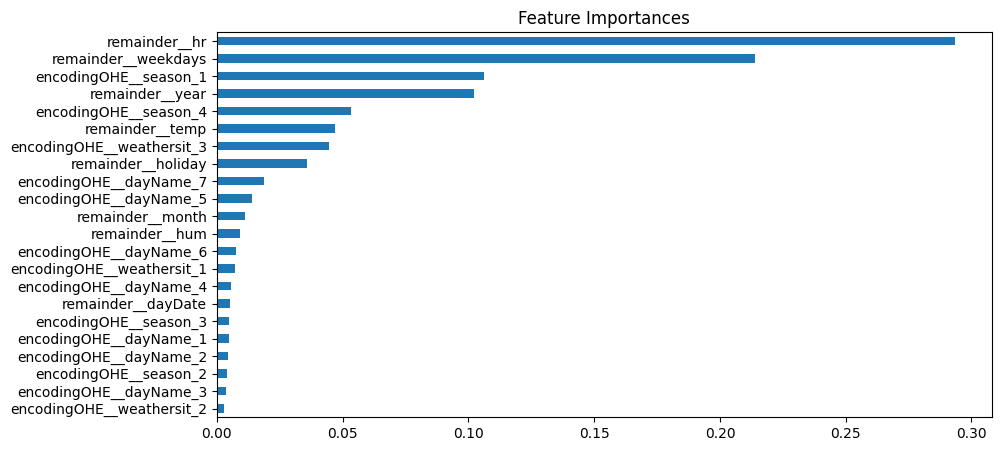

In [89]:
# Fit the transformer first
transformer.fit(xTrainBike)
feature_names = transformer.get_feature_names_out()

featureImp = pd.Series(tuned_xgbreg['model'].regressor_.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(10,5))
featureImp.plot(kind='barh', title='Feature Importances')
plt.show()


Terlihat dalam visualisasi feature importances diatas bahwa:
- Fitur/kolom hr merupakan fitur yang paling terpenting yang mana memiliki pengaruh yang cukup besar pada kasus ini
- kemudian fitur lainnya yang penting yaitu weekdays, season, temp dan year.

## **Kesimpulan**

Berdasarkan hasil benchmarking model, XGBRegressor() setelah tuning menunjukkan performa yang lebih baik dibandingkan dengan RandomForestRegressor(), dengan skor MAPE dan MAE yang lebih rendah. Kemudian setelah dilakukan evaluasi terhadap data test, Model XGB ini dapat dengan baik memprediksi data di luar set pelatihan, dengan MAPE sekitar dan MAE sekitar 23 pada test. MAPE dinilia menjadi metrik utama yang mana menunjukkan bahwa model XGB ini memiliki error prediksi atau kesalahan sekitar 22%, yang terlihat cukup besar tetapi lebih dapat diperjelas ketika dilihat dari skor MAE, dimana model hanya menyimpang sekitar 23 poin dari nilai aktual. 

Dalam analisis fitur, variabel waktu/jam sewa, status hari kerja, tahun, musim, dan suhu memiliki dampak yang signifikan dalam pembentukan pola prediksi jumlah pelanggan. Hal ini dapat memberikan wawasan yang berguna bagi tim strategis Bikeshare dalam memprediksi jumlah pelanggan di masa mendatang.

## **Rekomendasi**

1. Fitur/variable dapat diperluas lagi, seperti halnya pada kategori lingkungan, yang mana kita dapat menambahkan variable yang mewakili lingkungan model dapat memprediksi lokasi dengan lebih akurat. Kemudian jika kita ingin memprediksi berdasarkan lokasi, informasi populasi seperti demografi atau kepadatan penduduk bisa ditambahkan yang mana variable tersebut mungkin dapat mempengaruhi jumlah total penyewa sepeda.
2. sebelumnya pada proses benchmarking ditemukan bahwa pada top best base model (XGBRegressor) skor MAE 26% sedangkan MAPE yang cukup tinggi sekitar 45%, hal ini disebabkan karena model cukup sensitif dengan nilai target yang rendah sehingga menyebabkan kurang akuratnya jika model ini digunakan untuk memprediksi jumlah yang rendah. Ketidakakuratan ini mungkin disebabkan karena pola yang membingungkan diantara fitur-fiturnya yang mana sebagian besar dari fitur data ini merupakan kategorik. Maka dari itu untuk memastikannya, harus dicari tahu mengenai penyebab terjadinya hal ini. Dengan mengetahui fitur mana yang membingungkan pada saat proses learning, kita dapat melakukan spliting atau konversi fitur yang lebih mendalam lagi terhadap fitur-fitur tersebut.
3. Model ini lebih baik digunakan untuk memprediksi total pelanggan/penyewa sepeda dengan rentang yang besar (1-1000), karena dilihat dari keakuratannya, dimana pada prediksi jumlah yang lebih besar dapat memberikan hasil prediksi yang jauh lebih baik dibandingkan dengan memprediksi jumlah yang sedikit.

## **Save Model**

In [90]:
import pickle

estimator = tuned_xgbreg
estimator.fit(xTrainBike, yTrainBike)

pickle.dump(estimator, open('Model_Bikeshare_XGB.sav', 'wb'))